<a href="https://colab.research.google.com/github/Ashok940/medical-image-classification/blob/main/medical_image_classification_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import os
import pathlib
import keras as ks
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


In [ ]:
data_dir=pathlib.Path("/content/drive/MyDrive/kidney")

In [ ]:
img_hei,img_wei=180,180
batch_size=12
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_hei,img_wei),
    batch_size=batch_size
)

Found 809 files belonging to 4 classes.
Using 648 files for training.


In [ ]:
from keras.utils import image_dataset_from_directory
validation_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_hei,img_wei),
    batch_size=batch_size
    )




Found 809 files belonging to 4 classes.
Using 161 files for validation.


In [ ]:
train_class=train_ds.class_names

In [ ]:
train_class

['cyst', 'normal', 'stone', 'tumor']

In [ ]:
img=image.load_img("/content/drive/MyDrive/kidney/cyst/Cyst- (1).jpg")

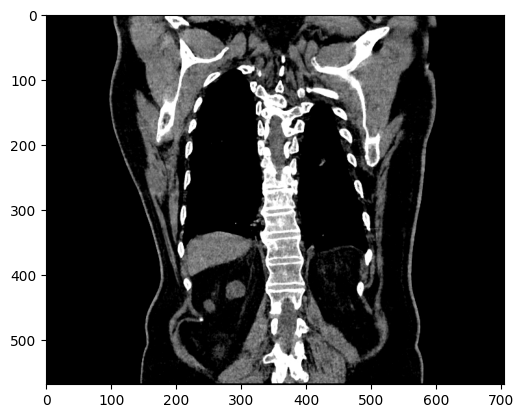

In [ ]:
plt.imshow(img)

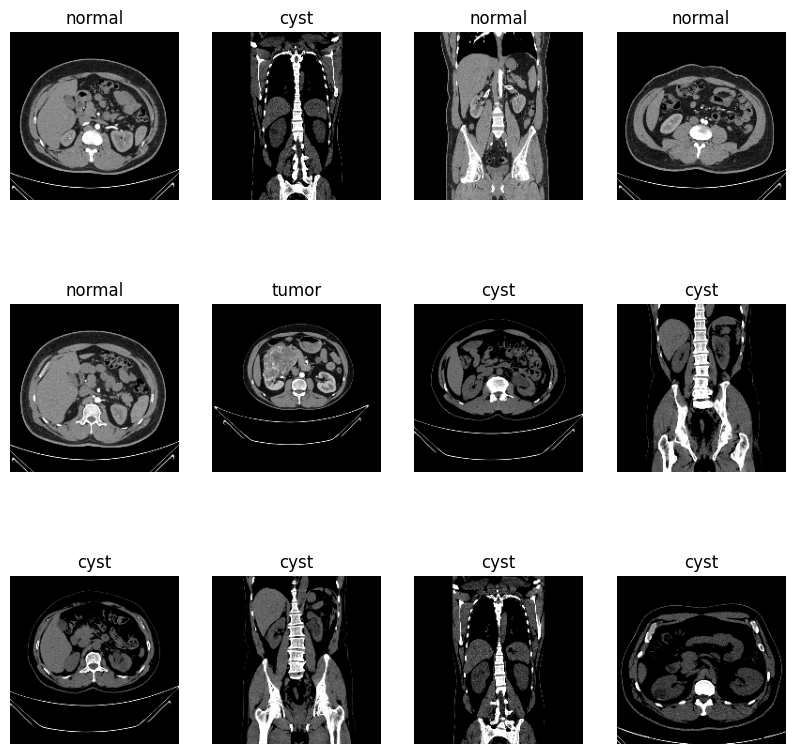

In [ ]:
plt.figure(figsize=(10,10))
for images,label in train_ds.take(1):
  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(train_class[label[i]])
    plt.axis("off")

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import relu,softmax
from tensorflow.keras.layers import Flatten
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

In [ ]:
num_classes=4
model=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_hei,img_wei,3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,activation='softmax')
    
])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


54/54 [==============================] - 89s 1s/step - loss: 0.3287 - accuracy: 0.8858 - val_loss: 0.0550 - val_accuracy: 1.0000
Epoch 2/10
54/54 [==============================] - 3s 49ms/step - loss: 0.0179 - accuracy: 0.9954 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 3/10
54/54 [==============================] - 3s 49ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 2.7397e-04 - val_accuracy: 1.0000
Epoch 4/10
54/54 [==============================] - 4s 77ms/step - loss: 5.0535e-04 - accuracy: 1.0000 - val_loss: 1.3534e-04 - val_accuracy: 1.0000
Epoch 5/10
54/54 [==============================] - 3s 49ms/step - loss: 7.9159e-05 - accuracy: 1.0000 - val_loss: 7.9298e-05 - val_accuracy: 1.0000
Epoch 6/10
54/54 [==============================] - 3s 49ms/step - loss: 5.3427e-05 - accuracy: 1.0000 - val_loss: 5.9932e-05 - val_accuracy: 1.0000
Epoch 7/10
54/54 [==============================] - 3s 49ms/step - loss: 4.0419e-05 - accuracy: 1.0000 - val_loss: 4.7639e-05 - val_accura

In [ ]:
hist=model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=20
)

Epoch 1/20
54/54 [==============================] - 4s 67ms/step - loss: 1.8315e-05 - accuracy: 1.0000 - val_loss: 2.5982e-05 - val_accuracy: 1.0000
Epoch 2/20
54/54 [==============================] - 3s 49ms/step - loss: 1.5828e-05 - accuracy: 1.0000 - val_loss: 2.3416e-05 - val_accuracy: 1.0000
Epoch 3/20
54/54 [==============================] - 3s 49ms/step - loss: 1.3720e-05 - accuracy: 1.0000 - val_loss: 2.1181e-05 - val_accuracy: 1.0000
Epoch 4/20
54/54 [==============================] - 3s 50ms/step - loss: 1.2072e-05 - accuracy: 1.0000 - val_loss: 1.9105e-05 - val_accuracy: 1.0000
Epoch 5/20
54/54 [==============================] - 5s 79ms/step - loss: 1.0697e-05 - accuracy: 1.0000 - val_loss: 1.7330e-05 - val_accuracy: 1.0000
Epoch 6/20
54/54 [==============================] - 3s 51ms/step - loss: 9.5616e-06 - accuracy: 1.0000 - val_loss: 1.6253e-05 - val_accuracy: 1.0000
Epoch 7/20
54/54 [==============================] - 3s 49ms/step - loss: 8.6062e-06 - accuracy: 1.0000 - v

In [ ]:
plt.style.use('dark_background')
def show_plot(history):
  fig=plt.figure(figsize=(10,6))
  ## for accuracy
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("models of accuracy")
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend(['x_train','validation_data'],loc='upper right')
  plt.grid(False)
  #### for loss
  plt.subplot(1,2,2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("model of loss")
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend(['x_train','validation_data'],loc='lower right')
  
  plt.grid(False)

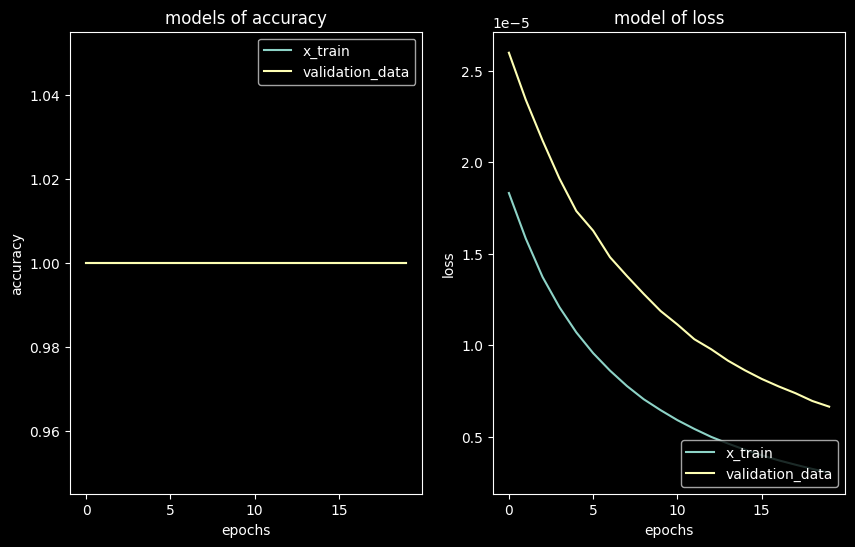

In [ ]:
show_plot(hist)

# save the model

In [ ]:
model.save("/content/drive/MyDrive/EZ Backup & Restore/medical_disease_model.h5")

In [ ]:
# def predict1(img):
#   img3d=img.reshape(-1,180,180,3)
#   img_res=img3d
#   prediction=model.predict(img_res)[0]
#   return {train_class[i]: float(prediction[i]) for i in range(4)}

In [ ]:
def predict2(img):
  img3d=img.reshape(-1,180,180,3)
  img_res=img3d
  prediction=model.predict(img_res)[0]
  return {train_class[i]: float(prediction[i]) for i in range(4)}

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7

In [ ]:
description='''PLEASE PUT THE IMAGE BELOW CATEGORY\n
1:cyst\n
2:normal\n
3:Tumor\n
4:Stone\n

'''
import gradio as gr
image=gr.inputs.Image(shape=(180,180))
label=gr.outputs.Label(num_top_classes=5)
demo=gr.Interface(
    fn=predict2,
    flagging_options=["Cyst", "Tumor", "Stone","Normal","Other"],
    inputs=image,
    outputs=label,
    title="MEDICAL DISEASE CLASSIFICATION BASED ON CNN",
    description=description,
    
    )

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [ ]:
demo.launch(debug=True,share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://0a259ad7617f842658.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 211ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://0a259ad7617f842658.gradio.live


In [ ]:
from sklearn.metrics import classification_report